In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
csv_root_path = "/root/dev/misc/splat_data.csv"
df = pd.read_csv(csv_root_path)

/tmp/ipykernel_7072/2997259178.py:8: DtypeWarning: Columns (9,15,20,28,36,44,52,60,68,76,84,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_root_path)


In [2]:
from graphing.setup.squidalytics_style import setup_style, COLORS
setup_style()

In [3]:
df

,season,period,game-ver,lobby,mode,stage,time,win,knockout,rank,...,B4-special,B4-inked,B4-abilities,medal1-grade,medal1-name,medal2-grade,medal2-name,medal3-grade,medal3-name,event
0,Drizzle Season 2022,2022-09-26 00:00:00+00:00,1.1.1,Anarchy (Open),Tower Control,Sturgeon Shipyard,204,True,-1,NaN,...,1,494,NaN,gold,#1 Overall Splatter,gold,#1 Enemy Splatter,gold,Record-Score Setter,NaN
1,Drizzle Season 2022,2022-09-26 00:00:00+00:00,1.1.1,Regular,Turf War,MakoMart,180,False,-1,NaN,...,2,723,NaN,gold,#1 Overall Splatter,gold,#1 Popular Target,gold,#1 Turf Inker,NaN
2,Drizzle Season 2022,2022-09-26 00:00:00+00:00,1.1.1,Anarchy (Series),Rainmaker,Wahoo World,318,True,-1,NaN,...,1,1028,NaN,gold,#1 Popular Target,gold,Record-Score Setter,silver,#1 Checkpoint Breaker,NaN
3,Drizzle Season 2022,2022-09-26 00:00:00+00:00,1.1.1,Regular,Turf War,MakoMart,180,True,-1,NaN,...,1,564,NaN,gold,#1 Overall Splatter,gold,#1 Enemy Splatter,gold,#1 Turf Inker,NaN
4,Drizzle Season 2022,2022-09-26 00:00:00+00:00,1.1.1,Anarchy (Series),Rainmaker,Scorch Gorge,113,True,-1,NaN,...,0,268,NaN,gold,#1 Splat Assister,gold,#1 Turf Inker,gold,Record-Score Setter,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204193,Sizzle Season 2023,2023-06-17 22:00:00+00:00,4.0.2,X Battle,Tower Control,Eeltail Alley,76,False,-1,NaN,...,1,329,"{""quick_respawn"":2.9,""swim_speed_up"":1.9,""inte...",silver,#2 Popular Target,gold,#1 Turf Inker,silver,#2 Splat Assister,NaN
1204194,Sizzle Season 2023,2023-06-17 22:00:00+00:00,4.0.2,Regular,Turf War,Museum d'Alfonsino,180,False,-1,NaN,...,1,701,"{""ink_saver_sub"":1.6,""quick_respawn"":1.3,""spec...",gold,#1 Overall Splatter,gold,#1 Enemy Splatter,gold,#1 Enemy-Base Inker,NaN
1204195,Sizzle Season 2023,2023-06-17 22:00:00+00:00,4.0.2,Regular,Turf War,Hagglefish Market,180,True,-1,NaN,...,1,739,"{""sub_resistance_up"":1.3,""special_charge_up"":1...",gold,#1 Splat Assister,silver,#2 Overall Splatter,silver,#2 Enemy Splatter,NaN
1204196,Sizzle Season 2023,2023-06-17 22:00:00+00:00,4.0.2,X Battle,Tower Control,MakoMart,134,True,-1,NaN,...,4,832,"{""special_power_up"":1.6,""special_charge_up"":1,...",gold,#1 Score Booster,gold,#1 Splat Assister,silver,#1 Checkpoint Breaker,NaN


In [4]:
df.columns

Index(['season', 'period', 'game-ver', 'lobby', 'mode', 'stage', 'time', 'win',
       'knockout', 'rank', 'power', 'alpha-inked', 'alpha-ink-percent',
       'alpha-count', 'alpha-color', 'alpha-theme', 'bravo-inked',
       'bravo-ink-percent', 'bravo-count', 'bravo-color', 'bravo-theme',
       'A1-weapon', 'A1-kill-assist', 'A1-kill', 'A1-assist', 'A1-death',
       'A1-special', 'A1-inked', 'A1-abilities', 'A2-weapon', 'A2-kill-assist',
       'A2-kill', 'A2-assist', 'A2-death', 'A2-special', 'A2-inked',
       'A2-abilities', 'A3-weapon', 'A3-kill-assist', 'A3-kill', 'A3-assist',
       'A3-death', 'A3-special', 'A3-inked', 'A3-abilities', 'A4-weapon',
       'A4-kill-assist', 'A4-kill', 'A4-assist', 'A4-death', 'A4-special',
       'A4-inked', 'A4-abilities', 'B1-weapon', 'B1-kill-assist', 'B1-kill',
       'B1-assist', 'B1-death', 'B1-special', 'B1-inked', 'B1-abilities',
       'B2-weapon', 'B2-kill-assist', 'B2-kill', 'B2-assist', 'B2-death',
       'B2-special', 'B2-inked', 

In [5]:
fresh_mask = df["season"] == "Fresh Season 2023"
x_mask = df["lobby"] == "X Battle"
df_fresh_x = df[fresh_mask & x_mask].copy()

In [6]:
def player_hash(row: pd.Series, player: str) -> str:
    weapon: str = row[f"{player}-weapon"]
    abilities: dict[str, float] = row[f"{player}-abilities"]
    return hash(f"{weapon},{abilities}")

In [7]:
for team in ["A", "B"]:
    for player in range(1, 5):
        player_name = f"{team}{player}"
        df_fresh_x[f"{player_name}-hash"] = df_fresh_x.apply(lambda row: player_hash(row, player_name), axis=1)
df_fresh_x

,season,period,game-ver,lobby,mode,stage,time,win,knockout,rank,...,medal3-name,event,A1-hash,A2-hash,A3-hash,A4-hash,B1-hash,B2-hash,B3-hash,B4-hash
631606,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,310,False,-1,NaN,...,#1 Splat Assister,NaN,-8272076821356349524,3058818988700522600,7745428296581111560,-9161600509027975047,6417057952681104992,3875655563586270836,6428289496944640691,-3649843678740688261
631607,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,224,False,-1,NaN,...,#1 Overall Splatter,NaN,6867494692631508590,-2425624617629290089,6007743599882540025,-8577417257640613574,8919051950715872085,7406982563087593854,3540180182840773133,1730131491120214614
631609,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,305,False,-1,NaN,...,#1 Ink Consumer,NaN,-6813656708008775778,486072050178084057,4787193961891864358,375648808493084564,2651234576896257440,1050734900019740453,5814741974259724701,3318799479327816394
631616,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,320,False,-1,NaN,...,#1 Enemy Splatter,NaN,2968725952692306178,6007743599882540025,-7731533413341842677,7578295944426870242,8919051950715872085,4570576978389703171,1730131491120214614,-2272633688489856153
631618,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,300,False,-1,NaN,...,#1 Clam Stopper,NaN,-6921959092540569975,7295440857488798853,331236383451733572,-840166223206907366,9219312564247788519,1243376516210967222,1783362409718934140,4148003256767989259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096972,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,79,False,-1,NaN,...,#1 Popular Target,NaN,427373893981536579,4938993883618184658,-8634853873037783591,1997874064991252711,-4650534095962077934,7281354484683682105,6456277413160628857,-2777153469133328164
1096976,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,Sturgeon Shipyard,118,True,-1,NaN,...,#1 Splat Zone Inker,NaN,427373893981536579,-1547677896152618074,457799008771123311,-7733194512485610083,-3864671479804326606,6894621728924588629,-2218219986540524636,1600723658890310566
1096981,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,115,False,-1,NaN,...,#1 Splat Zone Inker,NaN,427373893981536579,7446473172635370435,3820010694095174759,8513531538757183002,3991993233939739397,-4083729902108134386,-3873095343723525532,-1303642286803427477
1096990,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,196,True,-1,NaN,...,#1 Splat Zone Inker,NaN,427373893981536579,8226220552401881525,-8386790851245228792,-4839941981752307162,764325045360644619,-1621464998447982336,4162654385943187498,3857970983991233615


In [8]:
total_count = None
for team in ["A", "B"]:
    for player in range(1, 5):
        player_name = f"{team}{player}"
        counts = df_fresh_x[f"{player_name}-hash"].value_counts().rename("count")
        if total_count is None:
            total_count = counts
        else:
            total_count += counts
total_count

A1-hash
-42628404797788804         NaN
 4732421077124774401    1707.0
-6669188479587633093       NaN
 7248973880849639278       NaN
-4821978112215040045       NaN
                         ...  
-4810510389545042856       NaN
-4852634233443917848       NaN
-6782504659865061210       NaN
-8543618224164118360       NaN
-7089739514910066626       NaN
Name: count, Length: 7891, dtype: float64

In [9]:
hash_counts = pd.concat([df_fresh_x[f"{team}{player}-hash"] for team in ["A", "B"] for player in range(1, 5)]).value_counts()
hash_counts

 4732421077124774401    1707
-42628404797788804      1401
-6669188479587633093    1149
-2275173363093506133     945
 7248973880849639278     933
                        ... 
 7181570862185156018       1
 7075965544807937993       1
 9011522635602652290       1
-5040258096044828757       1
-1867525476691698199       1
Name: count, Length: 521498, dtype: int64

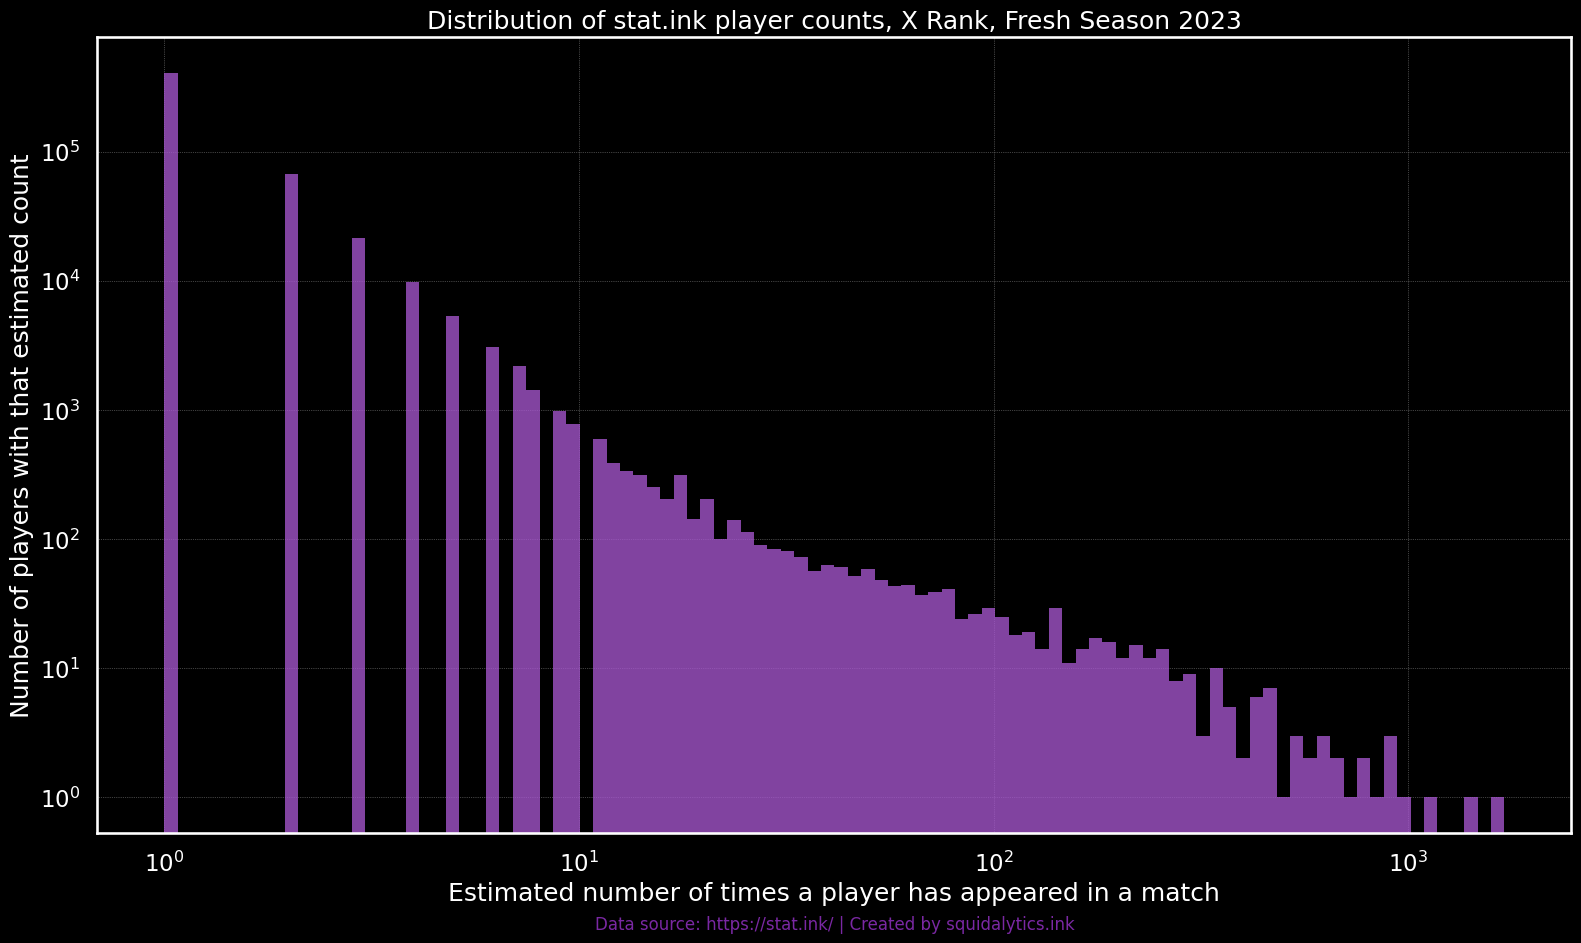

In [10]:
# Create a log histogram of the counts with no outlines
fig, ax = plt.subplots(figsize=(16, 9))
fig.tight_layout()
sns.histplot(hash_counts, bins=100, log_scale=(True, True), color=COLORS.accent_color, edgecolor="none", ax=ax)
ax.set_xlabel("Estimated number of times a player has appeared in a match")
ax.set_ylabel("Number of players with that estimated count")
ax.set_title("Distribution of stat.ink player counts, X Rank, Fresh Season 2023")
credit = "Data source: https://stat.ink/ | Created by squidalytics.ink"
ax.text(0.5, -0.12, credit, transform=ax.transAxes, ha='center', fontsize=12, color=COLORS.accent_darker)
plt.show()

In [30]:
# Test all distributions in scipy.stats for goodness of fit
from scipy import stats
from scipy.stats import kstest, chisquare, anderson, normaltest, shapiro, anderson_ksamp

# Get the distributions from scipy.stats programmatically
distributions = []
for name in dir(stats):
    if isinstance(getattr(stats, name), stats.rv_continuous):
        distributions.append(getattr(stats, name))

# Test each distribution
for distribution in distributions:
    print(f"Testing {distribution.name}")
    try:
        # Test the distribution
        stat, p = kstest(hash_counts, distribution.name, args=distribution.fit(hash_counts))
        # Only print the results if the test is significant
        if p >= 0.05:
            print(f"  p = {p}")
            print(f"  stat = {stat}")
    except Exception as e:
        pass

Testing alpha
Testing anglit
Testing arcsine
Testing argus
Testing beta
Testing betaprime
Testing bradford
Testing burr
Testing burr12


/root/.pyenv/versions/3.11.3/envs/SplatScratch/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:1135: RuntimeWarning: overflow encountered in power
  return np.log(c) + np.log(d) + sc.xlogy(c - 1, x) + sc.xlog1py(-d-1, x**c)


Testing cauchy
Testing chi
Testing chi2
Testing cosine
Testing crystalball
Testing dgamma
Testing dweibull
Testing erlang


/root/.pyenv/versions/3.11.3/envs/SplatScratch/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025.
  warnings.warn(
/root/.pyenv/versions/3.11.3/envs/SplatScratch/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  warnings.warn(
/root/.pyenv/versions/3.11.3/envs/SplatScratch/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0002777777777777778.
  warnings.warn(
/root/.pyenv/versions/3.11.3/envs/SplatScratch/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00041666666666666664.
  warnings.wa

Testing expon
Testing exponnorm
Testing exponpow
Testing exponweib


/root/.pyenv/versions/3.11.3/envs/SplatScratch/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:1861: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


Testing f
Testing fatiguelife
Testing fisk
Testing foldcauchy
Testing foldnorm
Testing gamma
Testing gausshyper


/root/.pyenv/versions/3.11.3/envs/SplatScratch/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:3958: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Testing genexpon
Testing genextreme
Testing gengamma
Testing genhalflogistic


KeyboardInterrupt: 

In [11]:
df_fresh_x.columns

Index(['season', 'period', 'game-ver', 'lobby', 'mode', 'stage', 'time', 'win',
       'knockout', 'rank', 'power', 'alpha-inked', 'alpha-ink-percent',
       'alpha-count', 'alpha-color', 'alpha-theme', 'bravo-inked',
       'bravo-ink-percent', 'bravo-count', 'bravo-color', 'bravo-theme',
       'A1-weapon', 'A1-kill-assist', 'A1-kill', 'A1-assist', 'A1-death',
       'A1-special', 'A1-inked', 'A1-abilities', 'A2-weapon', 'A2-kill-assist',
       'A2-kill', 'A2-assist', 'A2-death', 'A2-special', 'A2-inked',
       'A2-abilities', 'A3-weapon', 'A3-kill-assist', 'A3-kill', 'A3-assist',
       'A3-death', 'A3-special', 'A3-inked', 'A3-abilities', 'A4-weapon',
       'A4-kill-assist', 'A4-kill', 'A4-assist', 'A4-death', 'A4-special',
       'A4-inked', 'A4-abilities', 'B1-weapon', 'B1-kill-assist', 'B1-kill',
       'B1-assist', 'B1-death', 'B1-special', 'B1-inked', 'B1-abilities',
       'B2-weapon', 'B2-kill-assist', 'B2-kill', 'B2-assist', 'B2-death',
       'B2-special', 'B2-inked', 

In [12]:
# Turn the dataframe from wide to long
player_df = None
player_columns = [x[3:] for x in df_fresh_x.columns if x.startswith("A1")]
common_columns = ["season", "period", "game-ver", "lobby", "mode", "stage", "time", "win", "knockout", "rank", "power"]
player = "A1"
team = player[0]
position = int(player[1])
temp_df = df_fresh_x[common_columns + [f"{player}-{x}" for x in player_columns]].copy()
temp_df.columns = [x.replace(f"{player}-", "") for x in temp_df.columns]
temp_df["team"] = team
temp_df["position"] = position
temp_df["win"] = (temp_df["win"] & temp_df["team"] == "A") | (~temp_df["win"] & temp_df["team"] == "B")


In [13]:
def player_table(player: str) -> pd.DataFrame:
    team = player[0]
    position = int(player[1])
    temp_df = df_fresh_x[common_columns + [f"{player}-{x}" for x in player_columns]].copy()
    temp_df.columns = [x.replace(f"{player}-", "") for x in temp_df.columns]
    temp_df["team"] = team
    temp_df["position"] = position
    temp_df["win"] = (temp_df["win"] & temp_df["team"] == "A") | (~temp_df["win"] & temp_df["team"] == "B")
    return temp_df

player_table("A1")

,season,period,game-ver,lobby,mode,stage,time,win,knockout,rank,...,kill-assist,kill,assist,death,special,inked,abilities,hash,team,position
631606,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,310,False,-1,NaN,...,9,5,4,9,5,1553,"{""quick_super_jump"":1.2,""ink_saver_main"":0.9,""...",-8272076821356349524,A,1
631607,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,224,False,-1,NaN,...,13,6,7,8,1,786,"{""swim_speed_up"":1.9,""intensify_action"":1,""ink...",6867494692631508590,A,1
631609,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,305,False,-1,NaN,...,3,3,0,7,3,1084,"{""run_speed_up"":1.6,""ink_saver_sub"":0.6,""quick...",-6813656708008775778,A,1
631616,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,320,False,-1,NaN,...,14,12,2,10,2,1073,"{""swim_speed_up"":2.2,""ink_saver_main"":0.3,""ink...",2968725952692306178,A,1
631618,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,300,False,-1,NaN,...,5,5,0,9,0,711,"{""ink_saver_main"":1.9,""run_speed_up"":1.9,""ink_...",-6921959092540569975,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096972,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,79,False,-1,NaN,...,1,1,0,4,1,345,"{""ink_saver_sub"":1.3,""swim_speed_up"":1.2,""sub_...",427373893981536579,A,1
1096976,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,Sturgeon Shipyard,118,False,-1,NaN,...,3,3,0,1,2,652,"{""ink_saver_sub"":1.3,""swim_speed_up"":1.2,""sub_...",427373893981536579,A,1
1096981,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,115,False,-1,NaN,...,2,0,2,3,3,605,"{""ink_saver_sub"":1.3,""swim_speed_up"":1.2,""sub_...",427373893981536579,A,1
1096990,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,196,False,-1,NaN,...,9,9,0,5,3,992,"{""ink_saver_sub"":1.3,""swim_speed_up"":1.2,""sub_...",427373893981536579,A,1


In [14]:
player_df: pd.DataFrame = None
for team in ["A", "B"]:
    for player in range(1, 5):
        player_name = f"{team}{player}"
        player_df = pd.concat([player_df, player_table(player_name)])

player_df = player_df.reset_index(drop=True)
player_df

,season,period,game-ver,lobby,mode,stage,time,win,knockout,rank,...,kill-assist,kill,assist,death,special,inked,abilities,hash,team,position
0,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,310,False,-1,NaN,...,9,5,4,9,5,1553,"{""quick_super_jump"":1.2,""ink_saver_main"":0.9,""...",-8272076821356349524,A,1
1,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,224,False,-1,NaN,...,13,6,7,8,1,786,"{""swim_speed_up"":1.9,""intensify_action"":1,""ink...",6867494692631508590,A,1
2,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,305,False,-1,NaN,...,3,3,0,7,3,1084,"{""run_speed_up"":1.6,""ink_saver_sub"":0.6,""quick...",-6813656708008775778,A,1
3,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,320,False,-1,NaN,...,14,12,2,10,2,1073,"{""swim_speed_up"":2.2,""ink_saver_main"":0.3,""ink...",2968725952692306178,A,1
4,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,300,False,-1,NaN,...,5,5,0,9,0,711,"{""ink_saver_main"":1.9,""run_speed_up"":1.9,""ink_...",-6921959092540569975,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894699,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,79,False,-1,NaN,...,3,1,2,1,2,533,"{""ink_resistance_up"":2,""quick_respawn"":1,""run_...",-2777153469133328164,B,4
894700,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,Sturgeon Shipyard,118,False,-1,NaN,...,1,0,1,3,2,357,"{""swim_speed_up"":2.3,""ink_resistance_up"":0.6,""...",1600723658890310566,B,4
894701,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,115,False,-1,NaN,...,2,1,1,3,0,333,"{""quick_respawn"":1.9,""swim_speed_up"":0.6,""ink_...",-1303642286803427477,B,4
894702,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,196,False,-1,NaN,...,5,4,1,6,4,1032,"{""ink_saver_sub"":0.6,""quick_respawn"":0.6,""swim...",3857970983991233615,B,4


In [15]:
appearance_map = player_df.groupby("hash")["win"].count().rename("appearances")
player_df["weight"] = player_df["hash"].map(appearance_map).rdiv(1)
player_df["period"] = pd.to_datetime(player_df["period"])
player_df

,season,period,game-ver,lobby,mode,stage,time,win,knockout,rank,...,kill,assist,death,special,inked,abilities,hash,team,position,weight
0,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,310,False,-1,NaN,...,5,4,9,5,1553,"{""quick_super_jump"":1.2,""ink_saver_main"":0.9,""...",-8272076821356349524,A,1,0.003650
1,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,224,False,-1,NaN,...,6,7,8,1,786,"{""swim_speed_up"":1.9,""intensify_action"":1,""ink...",6867494692631508590,A,1,1.000000
2,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,305,False,-1,NaN,...,3,0,7,3,1084,"{""run_speed_up"":1.6,""ink_saver_sub"":0.6,""quick...",-6813656708008775778,A,1,0.076923
3,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Manta Maria,320,False,-1,NaN,...,12,2,10,2,1073,"{""swim_speed_up"":2.2,""ink_saver_main"":0.3,""ink...",2968725952692306178,A,1,0.010101
4,Fresh Season 2023,2023-03-01 00:00:00+00:00,3.0.0,X Battle,Clam Blitz,Inkblot Art Academy,300,False,-1,NaN,...,5,0,9,0,711,"{""ink_saver_main"":1.9,""run_speed_up"":1.9,""ink_...",-6921959092540569975,A,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894699,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,79,False,-1,NaN,...,1,2,1,2,533,"{""ink_resistance_up"":2,""quick_respawn"":1,""run_...",-2777153469133328164,B,4,1.000000
894700,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,Sturgeon Shipyard,118,False,-1,NaN,...,0,1,3,2,357,"{""swim_speed_up"":2.3,""ink_resistance_up"":0.6,""...",1600723658890310566,B,4,1.000000
894701,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,115,False,-1,NaN,...,1,1,3,0,333,"{""quick_respawn"":1.9,""swim_speed_up"":0.6,""ink_...",-1303642286803427477,B,4,0.500000
894702,Fresh Season 2023,2023-05-31 22:00:00+00:00,4.0.0,X Battle,Splat Zones,MakoMart,196,False,-1,NaN,...,4,1,6,4,1032,"{""ink_saver_sub"":0.6,""quick_respawn"":0.6,""swim...",3857970983991233615,B,4,1.000000


In [16]:
mode_totals = player_df.groupby(["mode", pd.Grouper(key="period", freq="W")])["weight"].sum()
mode_totals

mode           period                   
Clam Blitz     2023-03-05 00:00:00+00:00     4629.300950
               2023-03-12 00:00:00+00:00     7646.093397
               2023-03-19 00:00:00+00:00     7386.927427
               2023-03-26 00:00:00+00:00     8419.500764
               2023-04-02 00:00:00+00:00     5864.790808
               2023-04-09 00:00:00+00:00    10084.136422
               2023-04-16 00:00:00+00:00     6232.990082
               2023-04-23 00:00:00+00:00     5883.398810
               2023-04-30 00:00:00+00:00     7121.126149
               2023-05-07 00:00:00+00:00     4666.367922
               2023-05-14 00:00:00+00:00     7224.331106
               2023-05-21 00:00:00+00:00     5783.976603
               2023-05-28 00:00:00+00:00     7224.673290
               2023-06-04 00:00:00+00:00     3295.068957
Rainmaker      2023-03-05 00:00:00+00:00     5632.716462
               2023-03-12 00:00:00+00:00     9882.117467
               2023-03-19 00:00:00+00:00     97

In [17]:
weapon_mode_df = (
    player_df.groupby(
        ["weapon", "mode", pd.Grouper(key="period", freq="W")]
        )
    ["weight"].sum()
    .div(mode_totals)
    .unstack("mode")
    .assign(mean=lambda x: x.mean(axis=1))
    .swaplevel(0, 1)
    .sort_index()
    .rename(columns={"mean": "Mean Weight"})
)
weapon_mode_df

mode                                           Clam Blitz  Rainmaker  \
weapon              period                                             
.52 Gal             2023-03-05 00:00:00+00:00    0.032904   0.027029   
                    2023-03-12 00:00:00+00:00    0.031000   0.031673   
                    2023-03-19 00:00:00+00:00    0.034661   0.034543   
                    2023-03-26 00:00:00+00:00    0.036672   0.034608   
                    2023-04-02 00:00:00+00:00    0.032552   0.031503   
...                                                   ...        ...   
Zink Mini Splatling 2023-05-07 00:00:00+00:00    0.002893   0.002359   
                    2023-05-14 00:00:00+00:00    0.002722   0.001570   
                    2023-05-21 00:00:00+00:00    0.002990   0.001626   
                    2023-05-28 00:00:00+00:00    0.001430   0.001291   
                    2023-06-04 00:00:00+00:00    0.005867   0.003884   

mode                                           Splat Zones  Tower Control  \
weapon              period                                                  
.52 Gal             2023-03-05 00:00:00+00:00     0.026669       0.019305   
                    2023-03-12 00:00:00+00:00     0.026786       0.022707   
                    2023-03-19 00:00:00+00:00     0.026691       0.027130   
                    2023-03-26 00:00:00+00:00     0.028299       0.024951   
                    2023-04-02 00:00:00+00:00     0.026201       0.025145   
...                                                    ...            ...   
Zink Mini Splatling 2023-05-07 00:00:00+00:00     0.002942       0.002928   
                    2023-05-14 00:00:00+00:00     0.002786       0.003081   
                    2023-05-21 00:00:00+00:00     0.002837       0.003290   
                    2023-05-28 00:00:00+00:00     0.003112       0.002714   
                    2023-06-04 00:00:00+00:00     0.004110       0.004470   

mode                                           Mean Weight  
weapon              period                                  
.52 Gal             2023-03-05 00:00:00+00:00     0.026477  
                    2023-03-12 00:00:00+00:00     0.028041  
                    2023-03-19 00:00:00+00:00     0.030756  
                    2023-03-26 00:00:00+00:00     0.031132  
                    2023-04-02 00:00:00+00:00     0.028850  
...                                                    ...  
Zink Mini Splatling 2023-05-07 00:00:00+00:00     0.002780  
                    2023-05-14 00:00:00+00:00     0.002540  
                    2023-05-21 00:00:00+00:00     0.002685  
                    2023-05-28 00:00:00+00:00     0.002137  
                    2023-06-04 00:00:00+00:00     0.004583  

[1106 rows x 5 columns]

In [18]:
# convert weeks from datetime to integers starting at 0
earliest_week = weapon_mode_df.index.get_level_values("period").min()
week_remap = (
    weapon_mode_df.index
    .get_level_values("period")
    .to_series()
    .apply(lambda x: (x - earliest_week).days // 7 + 1)
    .drop_duplicates()
)
weapon_mode_df.index = (
    weapon_mode_df.index
    .set_levels(week_remap, level="period")
    .rename("week", level="period")
)
weapon_mode_df

mode                      Clam Blitz  Rainmaker  Splat Zones  Tower Control  \
weapon              week                                                      
.52 Gal             1       0.032904   0.027029     0.026669       0.019305   
                    2       0.031000   0.031673     0.026786       0.022707   
                    3       0.034661   0.034543     0.026691       0.027130   
                    4       0.036672   0.034608     0.028299       0.024951   
                    5       0.032552   0.031503     0.026201       0.025145   
...                              ...        ...          ...            ...   
Zink Mini Splatling 10      0.002893   0.002359     0.002942       0.002928   
                    11      0.002722   0.001570     0.002786       0.003081   
                    12      0.002990   0.001626     0.002837       0.003290   
                    13      0.001430   0.001291     0.003112       0.002714   
                    14      0.005867   0.003884     0.004110       0.004470   

mode                      Mean Weight  
weapon              week               
.52 Gal             1        0.026477  
                    2        0.028041  
                    3        0.030756  
                    4        0.031132  
                    5        0.028850  
...                               ...  
Zink Mini Splatling 10       0.002780  
                    11       0.002540  
                    12       0.002685  
                    13       0.002137  
                    14       0.004583  

[1106 rows x 5 columns]

In [19]:
weapon_mode_df.to_csv("weapon_mode_df.csv")

In [20]:
week_remap

period
2023-03-05 00:00:00+00:00     1
2023-03-12 00:00:00+00:00     2
2023-03-19 00:00:00+00:00     3
2023-03-26 00:00:00+00:00     4
2023-04-02 00:00:00+00:00     5
2023-04-09 00:00:00+00:00     6
2023-04-16 00:00:00+00:00     7
2023-04-23 00:00:00+00:00     8
2023-04-30 00:00:00+00:00     9
2023-05-07 00:00:00+00:00    10
2023-05-14 00:00:00+00:00    11
2023-05-21 00:00:00+00:00    12
2023-05-28 00:00:00+00:00    13
2023-06-04 00:00:00+00:00    14
Name: period, dtype: int64

In [21]:
import datetime as dt

def interpolate_date(date: dt.datetime) -> float:
    # Use the week_remap from above to convert the date to a float
    # Turn the input date to GMT
    date = date.astimezone(dt.timezone.utc)
    return (date - earliest_week).days / 7 + 1

dates = [
    ((2023, 3, 9), "3.0.1"),
    ((2023, 3, 31), "3.1.0"),
    ((2023, 5, 2), "3.1.1"),
    ((2023, 5, 31), "4.0.0"),
]
dates = [(dt.datetime(*x[0], tzinfo=dt.timezone.utc), x[1]) for x in dates]
[(interpolate_date(x), y) for x, y in dates]

[(1.5714285714285714, '3.0.1'),
 (4.714285714285714, '3.1.0'),
 (9.285714285714286, '3.1.1'),
 (13.428571428571429, '4.0.0')]